Dataset https://www.kaggle.com/datasets/ahsan81/used-handheld-device-data/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("used_device_data.csv")
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [2]:
df = df.dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3253 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3253 non-null   object 
 1   os                     3253 non-null   object 
 2   screen_size            3253 non-null   float64
 3   4g                     3253 non-null   object 
 4   5g                     3253 non-null   object 
 5   rear_camera_mp         3253 non-null   float64
 6   front_camera_mp        3253 non-null   float64
 7   internal_memory        3253 non-null   float64
 8   ram                    3253 non-null   float64
 9   battery                3253 non-null   float64
 10  weight                 3253 non-null   float64
 11  release_year           3253 non-null   int64  
 12  days_used              3253 non-null   int64  
 13  normalized_used_price  3253 non-null   float64
 14  normalized_new_price   3253 non-null   float64
dtypes: float6

In [4]:
from collections import Counter
Counter(df["os"])

Counter({'Android': 3024, 'Others': 128, 'iOS': 36, 'Windows': 65})

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])
        
df

C:\Users\niloy\AppData\Local\Temp\ipykernel_27888\3351412946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\niloy\AppData\Local\Temp\ipykernel_27888\3351412946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\niloy\AppData\Local\Temp\ipykernel_27888\3351412946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,10,0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,10,0,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,10,0,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,10,0,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,10,0,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,2,3,15.27,1,0,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3450,3,0,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,1,0,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,1,0,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [6]:
df['normalized_used_price'] = round(df['normalized_used_price']*100)
df['normalized_new_price'] = round(df['normalized_new_price']*100)

C:\Users\niloy\AppData\Local\Temp\ipykernel_27888\458564909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_used_price'] = round(df['normalized_used_price']*100)
C:\Users\niloy\AppData\Local\Temp\ipykernel_27888\458564909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_new_price'] = round(df['normalized_new_price']*100)


<Axes: >

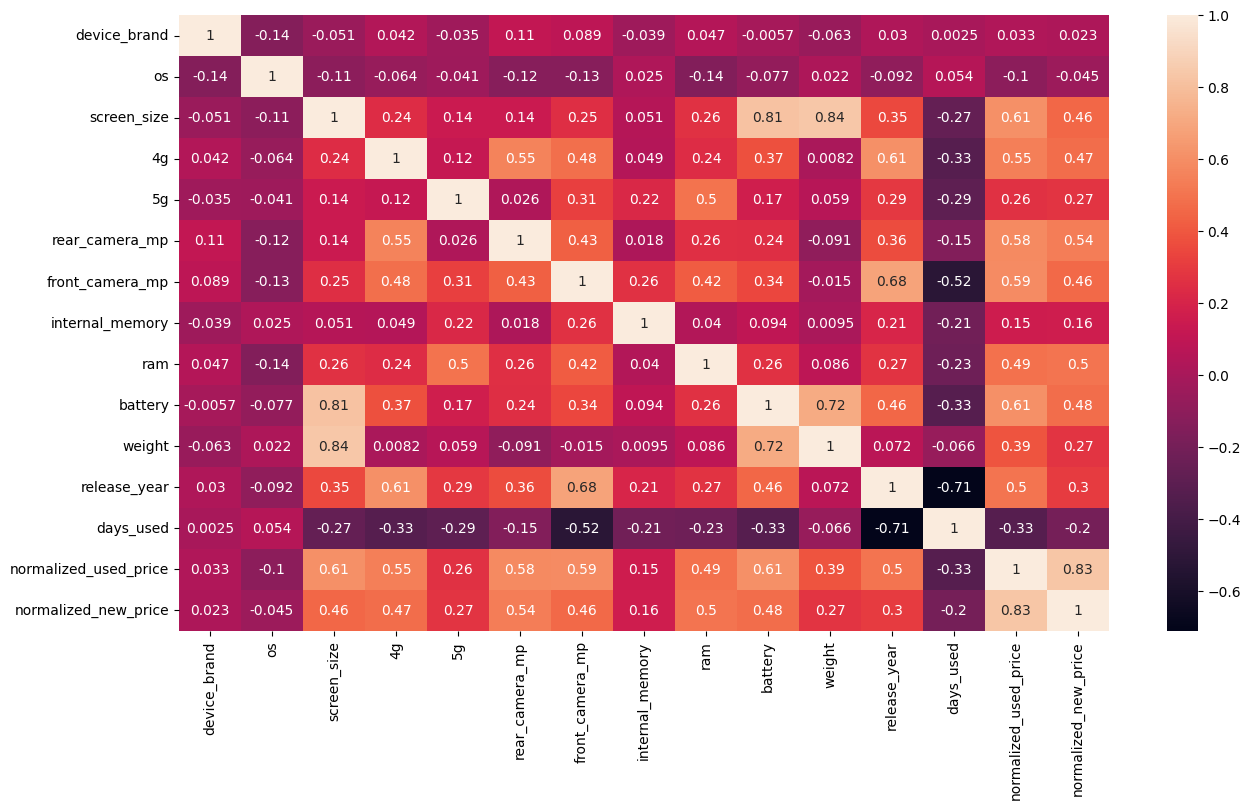

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

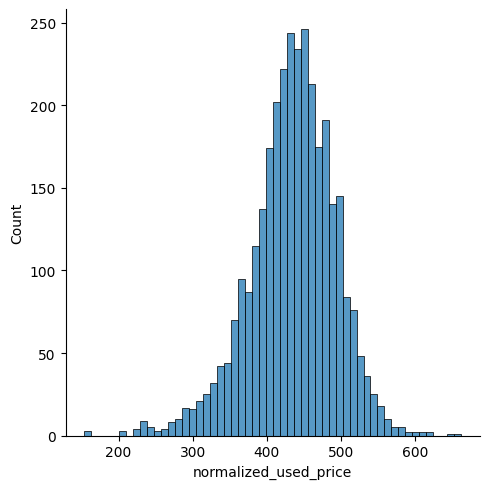

In [8]:
sns.displot(data=df, x="normalized_used_price")

## Clustering

In [17]:
import pandas as pd
from sklearn.cluster import KMeans


# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['normalized_used_price']])

# Assign labels to clusters
cluster_means = df.groupby('cluster')['normalized_used_price'].mean()
flagship_cluster = cluster_means.idxmax()  
df['category'] = df['cluster'].apply(lambda x: 'flagship' if x == flagship_cluster else 'mid-range')

print(df[['normalized_used_price', 'category']])

      normalized_used_price   category
0                     431.0   flagship
1                     516.0   flagship
2                     511.0   flagship
3                     514.0   flagship
4                     439.0   flagship
...                     ...        ...
3447                  510.0   flagship
3450                  504.0   flagship
3451                  436.0   flagship
3452                  435.0   flagship
3453                  413.0  mid-range

[3253 rows x 2 columns]


C:\Users\niloy\AppData\Local\Temp\ipykernel_2652\3238483237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(df[['normalized_used_price']])
C:\Users\niloy\AppData\Local\Temp\ipykernel_2652\3238483237.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['cluster'].apply(lambda x: 'flagship' if x == flagship_cluster else 'mid-range')


In [19]:
df["category"].value_counts()

category
flagship     1996
mid-range    1257
Name: count, dtype: int64

In [22]:
df[df["category"]=="flagship"].drop(columns=["cluster", "category"]).to_csv("flagship.csv", index=False)
df[df["category"]=="mid-range"].drop(columns=["cluster", "category"]).to_csv("mid-range.csv", index=False)

<Axes: >

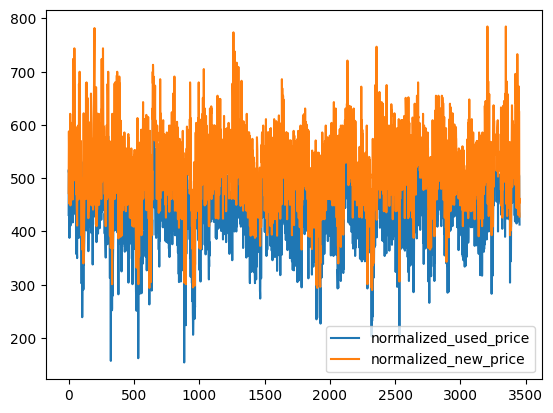

In [12]:
df[["normalized_used_price", "normalized_new_price"]].plot()

In [7]:
X = df.drop(columns=["normalized_used_price"])
y = df["normalized_used_price"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [8]:
X_train.shape

(2602, 14)

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint


model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    
    layers.Dense(16, activation='relu'),

    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mape'])


checkpoint = ModelCheckpoint('best_model.h5', 
                             monitor='val_mape', 
                             mode='min', 
                             save_best_only=True, 
                             verbose=1)



# # Train the model
# history = model.fit(X_train, y_train, 
#                     epochs=100, 
#                     batch_size=32, 
#                     validation_data=(X_test, y_test),
#                     callbacks=[checkpoint],
#                     verbose=2)

model.summary(expand_nested=True)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                480       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = tf.keras.models.load_model("best_model.h5")

In [13]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, root_mean_squared_error
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"MAE: {mae:.2f}, MAPE: {mape:.2f}, R2: {r2:.2f}, RMSE: {rmse:.2f}")

21/21 [==============================] - 0s 1ms/step
MAE: 17.45, MAPE: 0.04, R2: 0.87, RMSE: 22.17


In [15]:
# Example of using the model for a new input
new_input = X_test.iloc[56].values.reshape(1,-1)
prediction = model.predict(new_input)
prediction[0][0]

1/1 [==============================] - 0s 18ms/step


439.44208

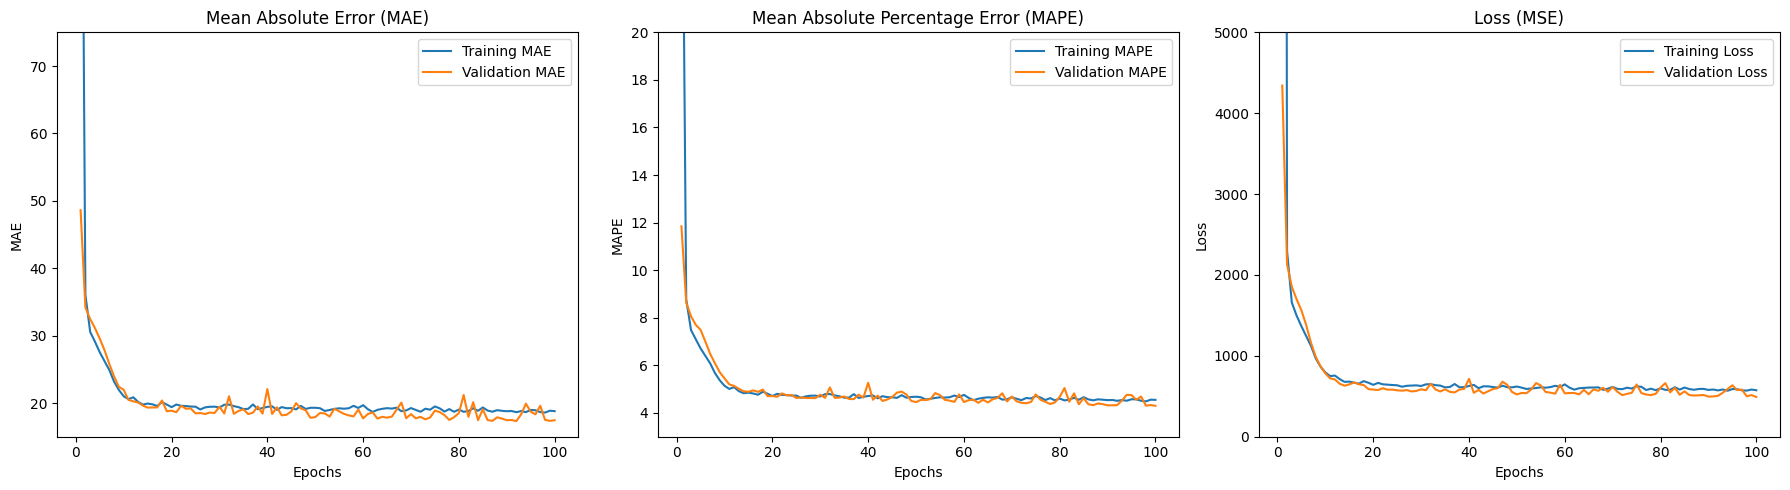

In [44]:
import matplotlib.pyplot as plt

# Plot training & validation loss and metrics values side by side in a 1x3 grid with zoom
def plot_history(history, ylim_mae=None, ylim_mape=None, ylim_loss=None):
    # Extract data from the history object
    mae = history.history['mae']
    val_mae = history.history['val_mae']
    mape = history.history['mape']
    val_mape = history.history['val_mape']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)
    
    # Create a 1x3 subplot for all metrics and loss
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    # Plot MAE
    axs[0].plot(epochs, mae, label='Training MAE')
    axs[0].plot(epochs, val_mae, label='Validation MAE')
    axs[0].set_title('Mean Absolute Error (MAE)')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('MAE')
    axs[0].legend()
    if ylim_mae:  # Set y-axis limit for MAE plot if provided
        axs[0].set_ylim(ylim_mae)

    # Plot MAPE
    axs[1].plot(epochs, mape, label='Training MAPE')
    axs[1].plot(epochs, val_mape, label='Validation MAPE')
    axs[1].set_title('Mean Absolute Percentage Error (MAPE)')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('MAPE')
    axs[1].legend()
    if ylim_mape:  # Set y-axis limit for MAPE plot if provided
        axs[1].set_ylim(ylim_mape)

    # Plot Loss
    axs[2].plot(epochs, loss, label='Training Loss')
    axs[2].plot(epochs, val_loss, label='Validation Loss')
    axs[2].set_title('Loss (MSE)')
    axs[2].set_xlabel('Epochs')
    axs[2].set_ylabel('Loss')
    axs[2].legend()
    if ylim_loss:  # Set y-axis limit for Loss plot if provided
        axs[2].set_ylim(ylim_loss)

    # Display the plots
    plt.tight_layout()
    plt.show()

# Call the function with y-axis limits to zoom into the plots
# Adjust the limits as per your dataset's value ranges for better zooming
plot_history(history, ylim_mae=(15, 75), ylim_mape=(3, 20), ylim_loss=(0, 5000))
